In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('merc_train_2.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_year_outlier
0,GLC Class,2019.000000,45299,Semi-Auto,2792.0,Diesel,145.0,40.4,2.0,1
1,unknown,2018.000000,19099,Semi-Auto,12321.0,Petrol,145.0,56.5,1.5,1
2,A Class,2019.000000,17702,Automatic,0.0,Diesel,145.0,68.9,1.5,1
3,unknown,2017.333333,21749,Semi-Auto,27178.0,Diesel,160.0,51.4,2.0,1
4,E Class,2018.000000,35950,Automatic,0.0,Diesel,0.0,42.8,3.0,1


In [3]:
df_1 = df[['price', 'mileage', 'tax', 'mpg']]
df_1.describe()

,price,mileage,tax,mpg
count,9877.000000,9877.000000,9877.000000,9877.000000
mean,23971.053255,15402.311127,91.363268,55.926223
std,9694.746739,19568.899969,75.595294,9.041756
min,1350.000000,0.000000,0.000000,32.100000
25%,17399.000000,0.000000,0.000000,51.400000
50%,22299.000000,8290.000000,145.000000,56.500000
75%,28480.000000,24164.000000,145.000000,61.400000
max,134219.000000,166086.000000,580.000000,78.500000


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [5]:
X_train = df[['mileage', 'tax', 'mpg']]
y_train = df['price']

X_train_s = scaler.fit_transform(X_train)
X_train_s

array([[-0.64443835,  0.70956067, -1.71725588],
       [-0.15746757,  0.70956067,  0.06346184],
       [-0.78712094,  0.70956067,  1.43494631],
       ...,
       [-0.78712094, -0.94406513,  1.08101483],
       [-0.78712094,  0.70956067,  1.43494631],
       [-0.71051592,  0.70956067, -1.96058377]])

In [6]:
df_X_s = pd.DataFrame(X_train_s, columns=X_train.columns)
df_X_s.describe()

,mileage,tax,mpg
count,9.877000e+03,9.877000e+03,9.877000e+03
mean,1.510722e-17,2.230113e-17,-3.028637e-16
std,1.000051e+00,1.000051e+00,1.000051e+00
min,-7.871209e-01,-1.208645e+00,-2.635266e+00
25%,-7.871209e-01,-1.208645e+00,-5.006164e-01
50%,-3.634681e-01,7.095607e-01,6.346184e-02
75%,4.477580e-01,7.095607e-01,6.054194e-01
max,7.700551e+00,6.464178e+00,2.496741e+00


In [7]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()

In [8]:
%%timeit
lr1.fit(X_train, y_train)

1.89 ms ± 35.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
from sklearn.metrics import mean_squared_error

y_pred = lr1.predict(X_train)
mean_squared_error(y_train, y_pred)

63325703.902901486

In [10]:
lr2 = LinearRegression()

In [11]:
%%timeit
lr2.fit(df_X_s, y_train)

1.87 ms ± 44.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
y_pred = lr2.predict(df_X_s)
mean_squared_error(y_train, y_pred)

63325703.9029015

In [13]:
for feature, coef in zip(X_train.columns, lr2.coef_):
  print(f'{feature}: {coef}')
print(f'Intercept: {lr2.intercept_}')

mileage: -3495.063559800523
tax: 594.5964174187611
mpg: -3551.151286845901
Intercept: 23971.053255036953


In [14]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

X_train_mm = mmscaler.fit_transform(X_train)

lr3 = LinearRegression()

In [15]:
%%timeit
lr3.fit(X_train_mm, y_train)

1.01 ms ± 24.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [16]:
y_pred = lr3.predict(X_train_mm)
mean_squared_error(y_train, y_pred)

63325703.9029015

<Axes: >

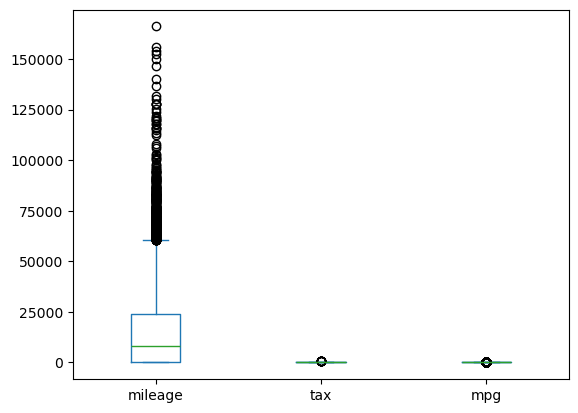

In [17]:
X_train.plot(kind='box')

<Axes: >

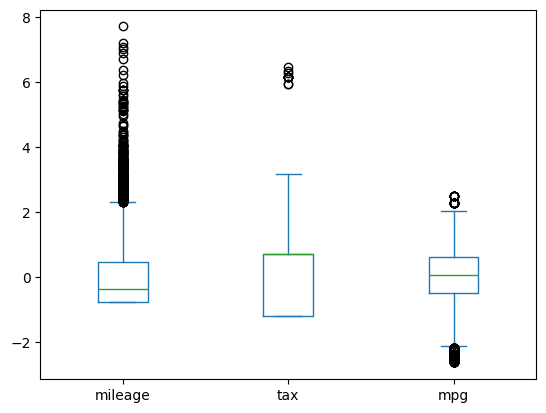

In [18]:
df_X_s.plot(kind='box')